---
format:
  html:
    embed-resources: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
%pip install palmerpenguins

In [3]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

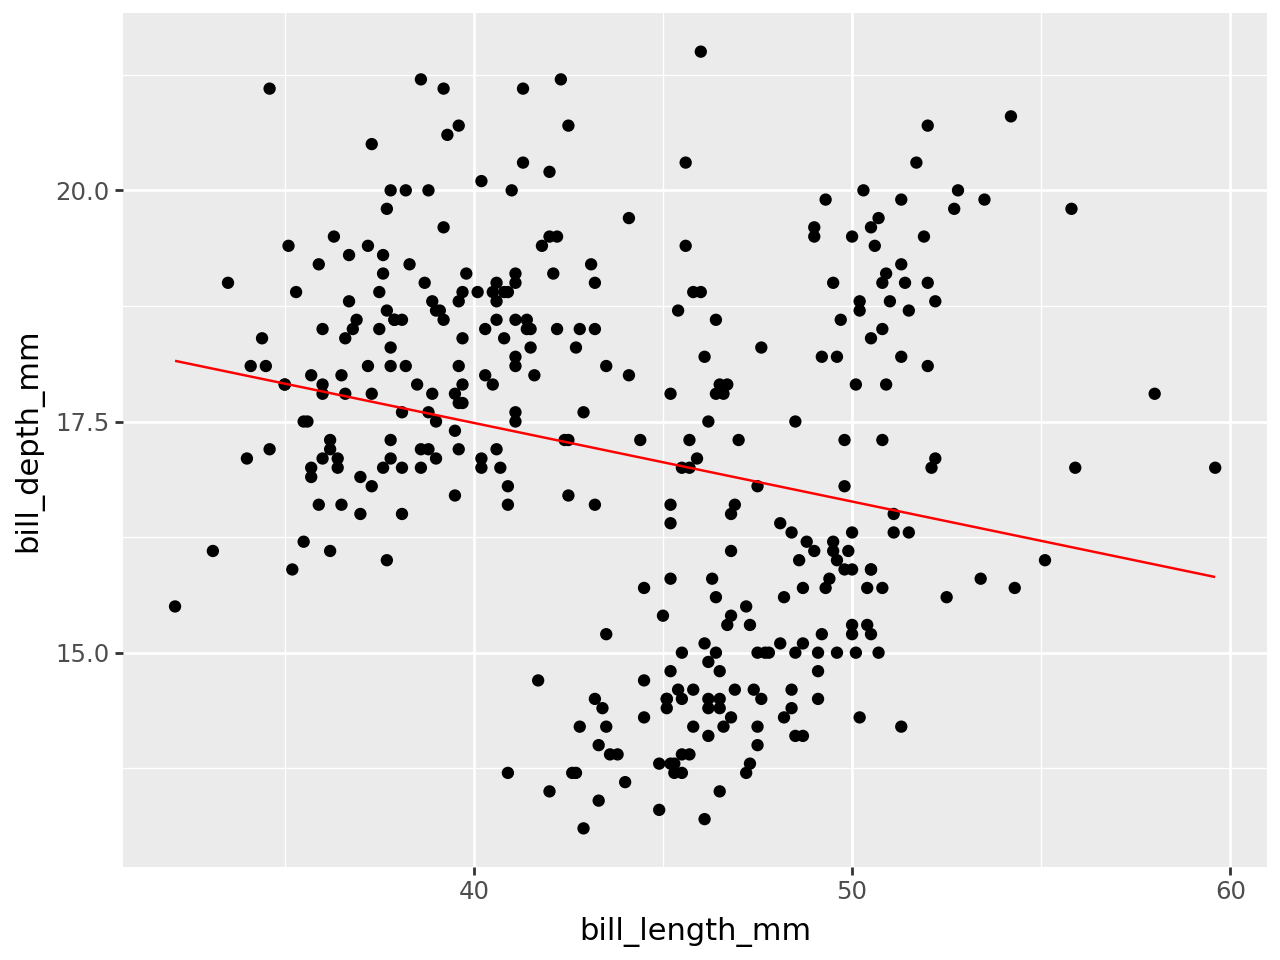

In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line

df = load_penguins().dropna(subset=['bill_length_mm', 'bill_depth_mm'])
x = df[['bill_length_mm']]
y = df['bill_depth_mm']

# foudn linear regression isn the scikit documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
model = LinearRegression()
model.fit(x, y)

# scikit documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
y_pred = model.predict(x)

# pieced togheter ggplot form textbook, documentation, and preffesor rosses notebookes
plot_df = pd.DataFrame({'bill_length_mm': x.values.flatten(), 'y_pred': y_pred})

(ggplot() +
 geom_point(df, aes(x='bill_length_mm', y='bill_depth_mm')) +
 geom_line(plot_df, aes(x='bill_length_mm', y='y_pred'), color='red'))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names


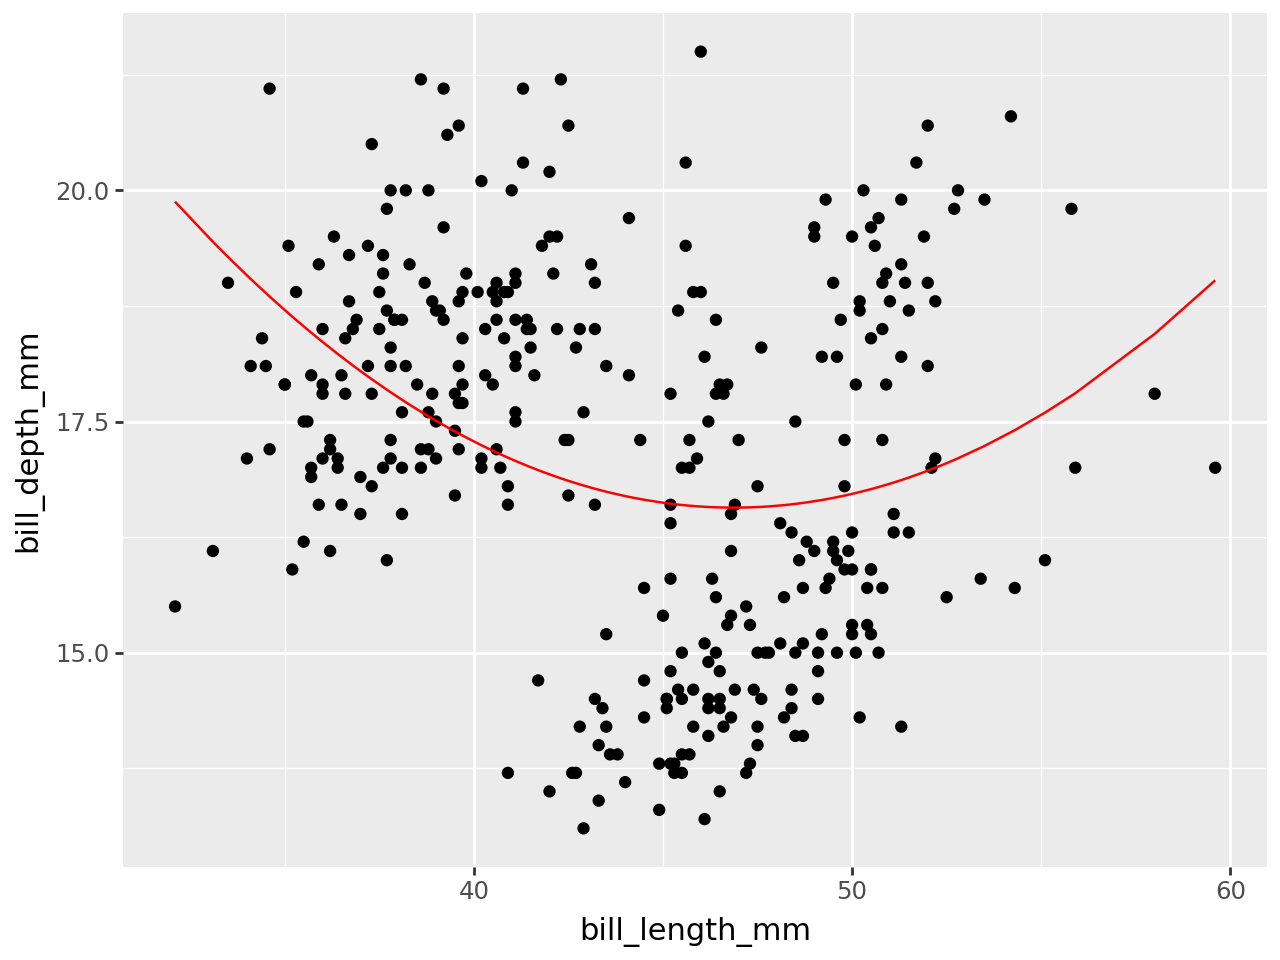

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line

penguins = load_penguins()
df = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm"])
x = df[["bill_length_mm"]]
y = df["bill_depth_mm"]

# found PolynomialFeatures in scikit documentation https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# makes a df into a polynomial, with a consant, linear, adn quadraitic for each input, can put in however many degrees you want
poly = PolynomialFeatures(2)

# found fit_transform in scikit doc https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform
# applyies PolynomialFeaturews to bill_length
x_poly = poly.fit_transform(x)

# .fit from skikti, applys imputed x and y to a specified model
model = LinearRegression()
model.fit(x_poly, y)

# .sort orders the data so the regression amkes sence https://numpy.org/doc/stable/reference/generated/numpy.sort.html
x_sorted = np.sort(x.values, axis=0)
# scikit documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
y_pred = model.predict(poly.transform(x_sorted))


plot_df = pd.DataFrame({'bill_length_mm': x_sorted.flatten(), 'y_pred': y_pred})

(ggplot() +
 geom_point(df, aes(x='bill_length_mm', y='bill_depth_mm')) +
 geom_line(plot_df, aes(x='bill_length_mm', y='y_pred'), color='red'))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names


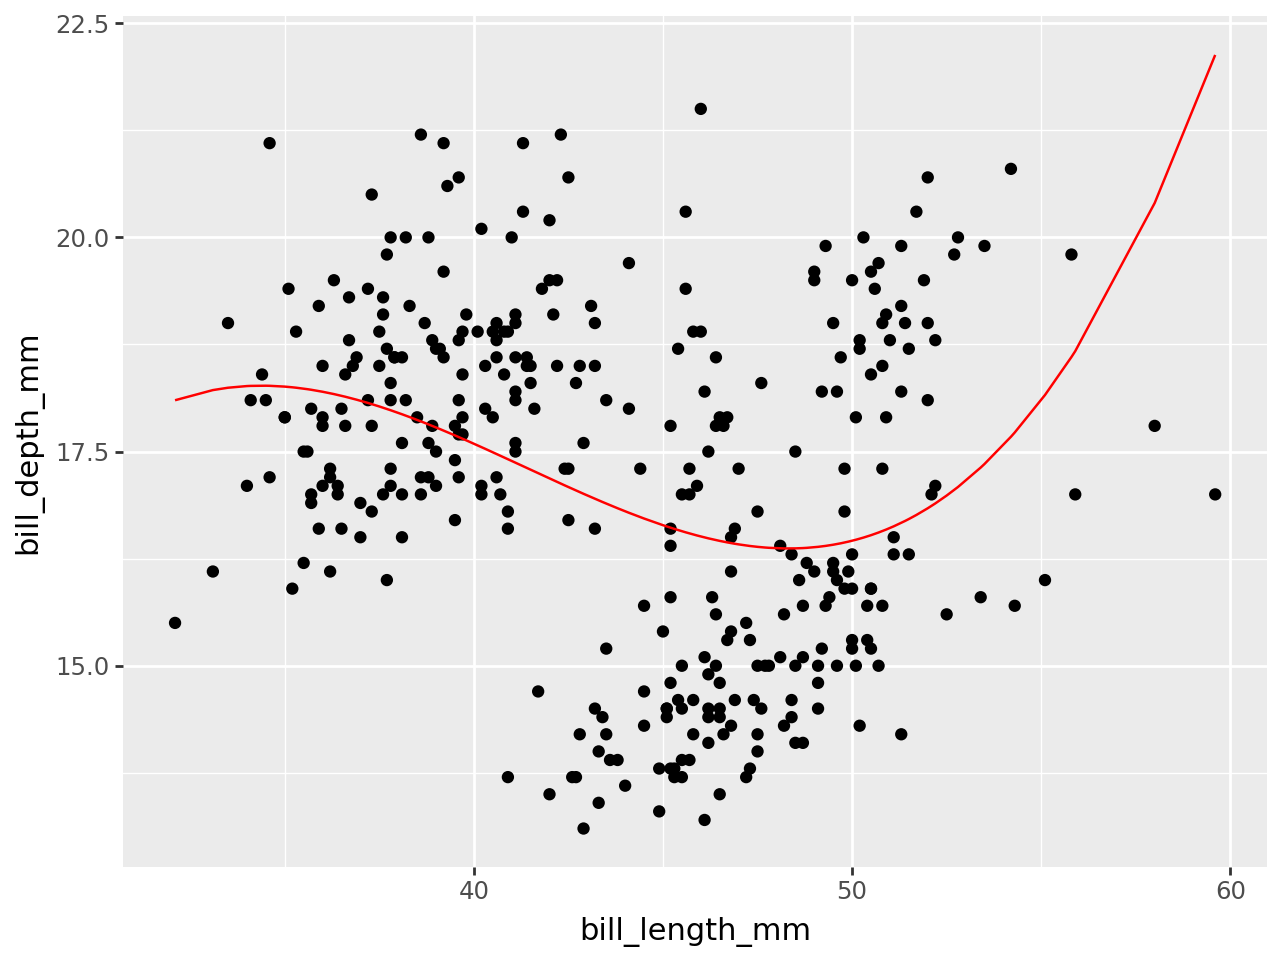

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line

penguins = load_penguins()
df = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm"])
x = df[["bill_length_mm"]]
y = df["bill_depth_mm"]

# found PolynomialFeatures in scikit documentation https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# makes a df into a polynomial, with a consant, linear, adn quadraitic for each input, can put in however many degrees you want
poly = PolynomialFeatures(3)

# found fit_transform in scikit doc https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform
# applyies PolynomialFeaturews to bill_length
x_poly = poly.fit_transform(x)

# .fit from skikti, applys imputed x and y to a specified model
model = LinearRegression()
model.fit(x_poly, y)

# .sort orders the data so the regression amkes sence https://numpy.org/doc/stable/reference/generated/numpy.sort.html
x_sorted = np.sort(x.values, axis=0)
# scikit documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
y_pred = model.predict(poly.transform(x_sorted))

plot_df = pd.DataFrame({'bill_length_mm': x_sorted.flatten(), 'y_pred': y_pred})

(ggplot() +
 geom_point(df, aes(x='bill_length_mm', y='bill_depth_mm')) +
 geom_line(plot_df, aes(x='bill_length_mm', y='y_pred'), color='red'))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names


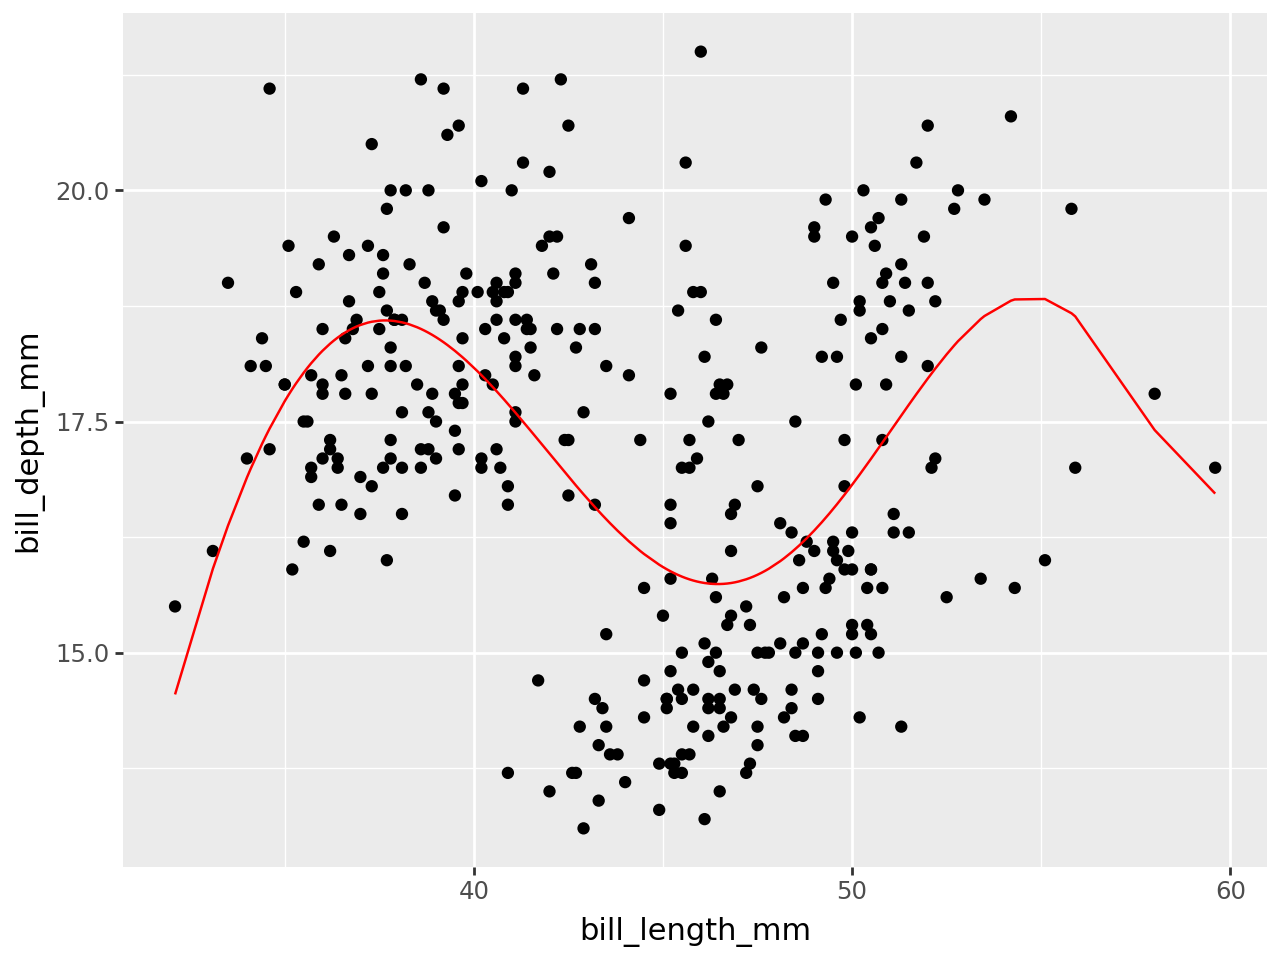

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line

penguins = load_penguins()
df = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm"])
x = df[["bill_length_mm"]]
y = df["bill_depth_mm"]

# found PolynomialFeatures in scikit documentation https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# makes a df into a polynomial, with a consant, linear, adn quadraitic for each input, can put in however many degrees you want
poly = PolynomialFeatures(10)

# found fit_transform in scikit doc https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform
# applyies PolynomialFeaturews to bill_length
x_poly = poly.fit_transform(x)

# .fit from skikti, applys imputed x and y to a specified model
model = LinearRegression()
model.fit(x_poly, y)

# .sort orders the data so the regression amkes sence https://numpy.org/doc/stable/reference/generated/numpy.sort.html
x_sorted = np.sort(x.values, axis=0)
# scikit documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
y_pred = model.predict(poly.transform(x_sorted))

plot_df = pd.DataFrame({'bill_length_mm': x_sorted.flatten(), 'y_pred': y_pred})

(ggplot() +
 geom_point(df, aes(x='bill_length_mm', y='bill_depth_mm')) +
 geom_line(plot_df, aes(x='bill_length_mm', y='y_pred'), color='red'))

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model underfits. The model with 10 degrees overfits. 3 seems slightly better fit than 2 so 3 would be the best fit.